## C S 329E HW 3

## Feature engineering and linear regression

## Kieran Cosgrove

For this weeks homework we are going to load in a data set that isn't the "cleanest", repair it, do some analysis on the features, estimate a continuous paramter using linear regression, and experiment with trying a few different methods of feature selection.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data mining. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt
import copy

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv("melb_data_sold_train.csv")

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all values to be defined.  Use list-wise deletion to remove entries with missing values

In [2]:
new_df = df
for column_title in new_df:
    new_df = new_df[new_df[column_title].notnull()]

## Q2 Add a new feature
Toorak is known as one of the pricest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of (-37.841820, 145.015986) for the center of Toorak.  You may assume the Earth is spherical and has radius of 6371.0088km (the first property in the data frame (-37.68178,144.73779) is approx 30 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
def haversine_distance(pt1, pt2):
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    in_lat, in_long = radians(pt1[0]), radians(pt1[1])
    other_lat, other_long = radians(pt2[0]), radians(pt2[1])
    r = 6371.0088
    
    lat_delta = in_lat - other_lat
    long_delta = in_long - other_long
    #print(lat_delta, long_delta)
    
    return 2*r*np.arcsin(sqrt( (sin(lat_delta/2))**2 + cos(in_lat)*cos(other_lat)*(sin(long_delta/2)**2 )))

In [4]:
# Step 2 : Use the defintion to calculate the distance for every row in the data frame
# Carry on the new data frame with the extra column named 'distance_to_toorak' for the rest of the homework
toorak = (-37.841820, 145.015986)
new_df["distance_to_toorak"] = new_df.apply(lambda x: haversine_distance((x["Lattitude"], x["Longtitude"]), toorak), axis = 1)
new_df["distance_to_toorak"]

1        4.261612
3        4.621843
4        4.374206
6        4.780655
7        4.152012
          ...    
7985    16.998846
7988    18.491623
7995    11.798784
7997    11.986684
7999    29.708163
Name: distance_to_toorak, Length: 3910, dtype: float64

## Q3 Create a one hot encoding for the categorical column 'Type'
Make sure the new columns are merged into the dataframe you are carrying through to the prediction step

In [5]:
type_cols = pd.get_dummies(new_df['Type'])
for col_title in type_cols:
    new_df[col_title] = type_cols[col_title]
type_cols

,h,t,u
1,1,0,0
3,1,0,0
4,1,0,0
6,1,0,0
7,0,0,1
...,...,...,...
7985,1,0,0
7988,1,0,0
7995,0,1,0
7997,0,1,0


## Q4 Calculate the correlations between all of your continuous value predictors
Use the Pearson correlation as discussed in the lectures. 

In [6]:
predictors = ["Rooms", "Price", "Postcode", "Bedroom2", "Bathroom", "Car", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Landsize", "distance_to_toorak", "h", "t", "u"]
correlations = []
for title1 in predictors:
    correlations.append([new_df[title1].corr(new_df[title2]) for title2 in predictors])
correlations

[[1.0,
  0.5028139970589657,
  0.05467550446068218,
  0.9416836881939682,
  0.59384662591449,
  0.4017163828132331,
  0.5478162395802538,
  -0.030446621758968364,
  0.012857821622476152,
  0.07484646284611587,
  0.0856755549739724,
  0.23284434150318145,
  0.5011278514572934,
  -0.04076215685801859,
  -0.5351017662290412],
 [0.5028139970589657,
  1.0,
  0.13646832124283947,
  0.48011522621006775,
  0.46298456207728916,
  0.22355172707590468,
  0.46559774240484103,
  -0.3305603367961711,
  -0.2244001085292783,
  0.18459714514251438,
  0.06402873246014888,
  -0.35701269892745036,
  0.39176140501646245,
  -0.09529455945537856,
  -0.3727657591343631],
 [0.05467550446068218,
  0.1364683212428395,
  0.9999999999999998,
  0.05931087838790853,
  0.12204640366386925,
  0.03469797841743664,
  0.08935518077661954,
  0.03556142930744642,
  -0.44562478308501574,
  0.4719342373418694,
  0.014276455236059,
  0.00806153782419569,
  -0.04050392015644018,
  -0.008545721818018007,
  0.05175376880727403],

## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric predictor columns we selected in the last question, and the home value as are the value you are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

In [7]:
# Step one, build the matrix X
new_predictors = copy.copy(predictors)
new_predictors.remove("Price")
X = np.column_stack([np.transpose(np.array([[1 for i in range(new_df.shape[0])]])), new_df[new_predictors].to_numpy()])

In [8]:
# Step two, build the column vector y
Y = np.transpose(np.array([new_df["Price"].to_numpy()]))
np.matrix([[1,5],[2, 10]])

matrix([[ 1,  5],
        [ 2, 10]])

In [9]:
# Step three, find beta hat per the formula (3.6)
#beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()),Y) # not working?? why?
beta_hat = np.linalg.lstsq(X, Y, rcond = 0)[0]

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the matrix you calculated in the last step to predict the housing prices for data in that file.  Create a visualization that shows the error in your predictions (hint:remember to do all your data pre-processing on the new file!).  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient. 

In [10]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing values
second_df = pd.read_csv("melb_data_sold_test.csv")
# mean IMPUTATION!!
averages = [second_df[second_df[pred].notnull()][pred].mean() for pred in predictors[:-4]]
for indx, pred in enumerate(predictors[:-4]):
    second_df.loc[second_df[pred].isnull(), pred] = averages[indx]

In [11]:
# Step one, add the new feature for the 'distance_to_toorak' and the one hot encoding to the new data frame
second_df["distance_to_toorak"] = second_df.apply(lambda x: haversine_distance((x["Lattitude"], x["Longtitude"]), toorak), axis = 1)
type_cols = pd.get_dummies(second_df['Type'])
for col_title in type_cols:
    second_df[col_title] = type_cols[col_title]

In [12]:
# Step two, build the matrix X using the new data frame
X2 = np.column_stack([np.transpose(np.array([[1 for i in range(second_df.shape[0])]])), second_df[new_predictors].to_numpy()])

In [13]:
# Step three, multiple the new matix X by Beta hat.  This is your predicted price
predicted_prices = np.dot(X2, beta_hat)

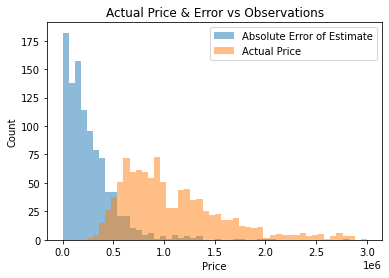

In [14]:
# Step four, calculate the absolute value of actual price - predicted price, call this our "absolute error"
# Create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent
error_prices = [abs(second_df.iloc[[indx]]["Price"].item() - price[0]) for indx, price in enumerate(predicted_prices)]
plt.hist(error_prices, alpha=0.5, bins = 50, range = (0, 3e6))
plt.hist(second_df["Price"], alpha=0.5, bins = 50, range = (0, 3e6))
plt.title("Actual Price & Error vs Observations")
plt.ylabel("Count")
plt.xlabel("Price")
plt.legend(["Absolute Error of Estimate", "Actual Price"])
plt.show()